In [ ]:
# 1.Reading data from file
#Logistic regression implementation is done by kavya sree Chirumamilla

In [132]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
rd1 = pd.read_csv(url, names=names)
rd1


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [133]:
# 2.Tracking missing data

In [134]:
print (rd1.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [135]:
# replacing 0's with mean of the column.


In [136]:
for i in rd1.columns:
  if i!='class':
    mean=rd1[i].mean()
    rd1[i]=rd1[i].mask(rd1[i] == 0,mean)
rd1

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [137]:
# 3.Checking for categorical data

In [138]:
rd1.select_dtypes(include=['category', object]).columns.tolist()

[]

From the above statements we can see that there is no cartegorical data.

In [139]:
#4. We don't have any ordinal values to map in the dataset.

In [140]:
# 5 and 6. Since we have no categorical data, we need not perfomr encoding in class lables or One Hot Encoding for this data set.

In [141]:
# 7. Partitioning a dataset into separate training and testing sets

In [142]:
from sklearn.model_selection import train_test_split
X, y = rd1.iloc[:,:7].values, rd1.iloc[:, 8].values
X_train, X_test, y_train, y_test =(train_test_split(X, y, test_size=0.3,random_state=0,stratify =y))
print(X_train)


[[ 10.         122.          78.         ...  79.79947917  27.6
    0.512     ]
 [  2.         158.          90.         ...  79.79947917  31.6
    0.805     ]
 [  3.84505208 107.          76.         ...  79.79947917  45.3
    0.686     ]
 ...
 [  3.          82.          70.         ...  79.79947917  21.1
    0.389     ]
 [  3.          78.          50.         ...  88.          31.
    0.248     ]
 [  3.84505208 161.          50.         ...  79.79947917  21.9
    0.254     ]]


As shown above, we have divided the given data into testing and training sets 

In [143]:
# 8. Normalization using min-max scaling

In [144]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
X_test_norm 

array([[0.17781576, 0.69677419, 0.59183673, ..., 0.31009615, 0.47648262,
        0.08198121],
       [0.17781576, 0.52258065, 0.44897959, ..., 0.07908591, 0.13292434,
        0.05465414],
       [0.125     , 0.49677419, 0.28571429, ..., 0.07908591, 0.36400818,
        0.02092229],
       ...,
       [0.        , 0.17419355, 0.55102041, ..., 0.03725962, 0.30674847,
        0.14688301],
       [0.5625    , 0.8       , 0.51020408, ..., 0.07908591, 0.40490798,
        0.19598634],
       [0.17781576, 0.31612903, 0.36734694, ..., 0.07908591, 0.34969325,
        0.07899231]])

In [145]:
# Task -1  Implementing Logistic regression
#b)	Display the value of the coefficient vector at the end of the training process.
#Task -3 Model evaluation
#Below is the code for classification accuracy achieved on the hold out test set


LR classification accuracy: 0.6493506493506493
weights /coefficients : [-0.00110612 -0.00308624 -0.00638453 -0.00238458 -0.00078492 -0.00244337
 -0.00133608]


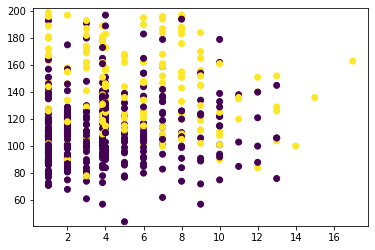

In [146]:
 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            
            linear_model = np.dot(X, self.weights) + self.bias 
            y_predicted = self._sigmoid(linear_model)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
           
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
                
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

   
# Testing
if __name__ == "__main__":
    
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    import matplotlib.pyplot as plt

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
    regressor.fit(X_train_norm, y_train)
    predictions = regressor.predict(X_test_norm)

    print("LR classification accuracy:", accuracy(y_test, predictions))
    print("weights /coefficients :" ,regressor.weights)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])
    x1_1 = (-regressor.weights[0] * x0_1 - regressor.bias) / regressor.weights[1]
    x1_2 = (-regressor.weights[0] * x0_2 - regressor.bias) / regressor.weights[1]
    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")
    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])


In [147]:
#Task-1 a.produce a visualization of the loss function with the number of training epochs. 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


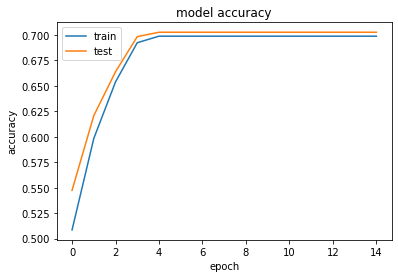

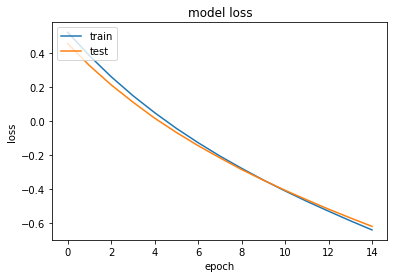

In [173]:

import matplotlib.pyplot as plt
import numpy

dataset = rd1

X = X_train_norm
Y = y_train

model = Sequential()
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=10, verbose=0)
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Task 2 Model training
#How did you decide to terminate the training process referred to in Task 1 above?
#Solution:
#As we can see from the above graphs, after certain number of iterations, the loss function remains unchanged.
#Also the accuracy will not increase any more. That is the correct point to terminate the training process.

**PREPROCESSING STEPS FOR 2nd DATA SET **

In [ ]:
# 1.Reading data from a file

In [150]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
 
import io
data = pd.read_csv(io.BytesIO(uploaded['german_credit_data.csv']))

Saving german_credit_data.csv to german_credit_data (4).csv


In [151]:
data


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Class
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,NaN,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,2


In [152]:
#2. Tracking Missing Data


print(data.isnull().sum())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Class                 0
dtype: int64


In [153]:
#2. Below step can be used to handle missing data by Imputing missing data, i.e, Replaced missing data with mode as the columns have non numeric data.
#Since we have a value in mapping for NAN, we are not considering this imputed data.(This step is just for reference)
import numpy as np
from sklearn.impute import SimpleImputer
imputed_data =pd.DataFrame()
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(data[['Saving accounts','Checking account']].values)
imputed_data[['Saving accounts','Checking account']] = imr.transform(data[['Saving accounts','Checking account']].values)
imputed_data




,Saving accounts,Checking account
0,little,little
1,little,moderate
2,little,little
3,little,little
4,little,little
...,...,...
995,little,little
996,little,little
997,little,little
998,little,little


In [154]:
#One hot encoding

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X=data[['Sex','Housing','Saving accounts','Checking account', 'Purpose']].values
ohe = ColumnTransformer([('anyname',OneHotEncoder(), [0])],remainder='passthrough')
print(ohe.fit_transform(X))


[[0.0 1.0 'own' nan 'little' 'radio/TV']
 [1.0 0.0 'own' 'little' 'moderate' 'radio/TV']
 [0.0 1.0 'own' 'little' nan 'education']
 ...
 [0.0 1.0 'own' 'little' nan 'radio/TV']
 [0.0 1.0 'free' 'little' 'little' 'radio/TV']
 [0.0 1.0 'own' 'moderate' 'moderate' 'car']]


In [155]:
#3,4. Handling Categorical data by  Mapping ordinal values. Since we have many columns with categorical data, we are mapping them as per the given values.

import numpy as np
sex_mapping= {'male':1,'female':0}
Housing_mapping=  {'own':1, 'free' :0, 'rent':2}
SA_mapping=  {np.nan :4, 'little':0, 'quite rich':2 ,'rich':3, 'moderate':1}
CA_mapping=  {'little' :0, 'moderate':1, np.nan:3, 'rich':2}
Purpose_mapping= {'radio/TV' :5, 'education':3, 'furniture/equipment':4, 'car':1, 'business':0 ,'domestic appliances':2, 'repairs' :6, 'vacation/others':7}

data['Sex'] = data['Sex'].map(sex_mapping)
data['Housing']=data['Housing'].map(Housing_mapping)
data['Saving accounts']=data['Saving accounts'].map(SA_mapping)
data['Checking account']=data['Checking account'].map(CA_mapping)
data['Purpose'] = data['Purpose'].map(Purpose_mapping)
data



,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Class
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,2
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,2
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,3,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,2


In [ ]:
#5 and 6.Since our categorical data is converted to numeric values after above step,
# we need not perfomr encoding in class lables or One Hot Encoding for this data set.

In [156]:
#7. Partitioning a dataset into separate training and testing sets
from sklearn.model_selection import train_test_split
X, y = data.iloc[:,:8].values, data.iloc[:, 9].values
X_train, X_test, y_train, y_test =(train_test_split(X, y, test_size=0.3,random_state=0,stratify =y))
print(X_train)


[[  27    1    2 ...    3 2463   24]
 [  33    0    2 ...    0 3966   18]
 [  30    0    2 ...    0 7721   24]
 ...
 [  38    0    2 ...    3 1240   12]
 [  20    1    2 ...    2 3617   24]
 [  36    1    2 ...    3 1262   15]]


In [157]:
#8.Normalization using min-max scaling

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
X_test_norm 

array([[0.03571429, 0.        , 0.66666667, ..., 1.        , 0.63039184,
        1.        ],
       [0.17857143, 1.        , 1.        , ..., 0.        , 0.40324944,
        0.35714286],
       [0.05357143, 1.        , 0.66666667, ..., 0.33333333, 0.18107678,
        0.35714286],
       ...,
       [0.44642857, 0.        , 0.33333333, ..., 0.33333333, 0.03249442,
        0.07142857],
       [0.42857143, 0.        , 0.33333333, ..., 1.        , 0.08066263,
        0.35714286],
       [0.19642857, 1.        , 1.        , ..., 0.33333333, 0.1155145 ,
        0.03571429]])

In [ ]:
# Task -1  Implementing Logistic regression
#b)	Display the value of the coefficient vector at the end of the training process.
#Task -3 Model evaluation
#Below is the code for classification accuracy achieved on the hold out test set


Classification accuracy: 0.7
weights /coefficients     : [0.02234421 0.05230538 0.04929191 0.04237458 0.01767056 0.03491853
 0.01572842 0.02491842]


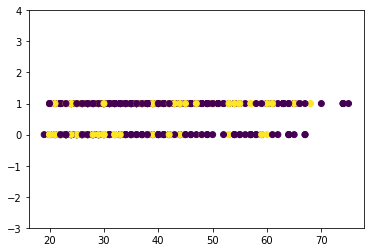

In [168]:
 
import numpy as np
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


# Testing
if __name__ == "__main__":
    # Imports
    from keras.models import Sequential
    from keras.layers import Dense
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    import matplotlib.pyplot as plt

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
    regressor.fit(X_train_norm, y_train)
    predictions = regressor.predict(X_test_norm)

    print("Classification accuracy:", accuracy(y_test, predictions))
    print("weights /coefficients     :" ,regressor.weights)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-regressor.weights[0] * x0_1 - regressor.bias) / regressor.weights[1]
    x1_2 = (-regressor.weights[0] * x0_2 - regressor.bias) / regressor.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


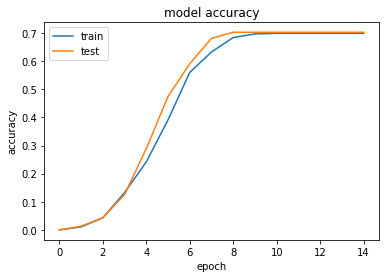

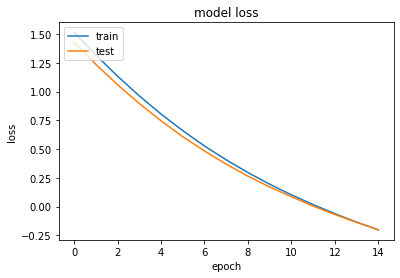

In [169]:

import matplotlib.pyplot as plt
import numpy

dataset = data

X = X_train_norm
Y = y_train

model = Sequential()
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=10, verbose=0)
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [170]:
#Task 2 Model training
#How did you decide to terminate the training process referred to in Task 1 above?
#Solution:
#As we can see from the above graphs, after certain number of iterations, the loss function remains unchanged.
#Also the accuracy will not increase any more. That is the correct point to terminate the training process.